### Download the dataset from the link available above

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\balir\Downloads\dataframe_.csv")
df

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


### Perform proper analysis of the dataset and draw conclusions based on your analysis

In [3]:
uniq=df.input.unique()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


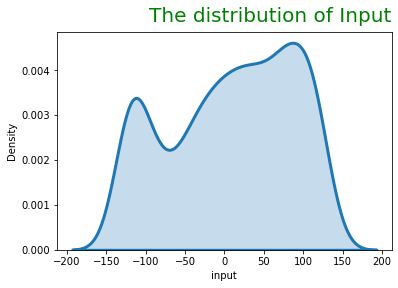

In [7]:
sns.distplot(df['input'], hist=False, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3})
plt.title("The distribution of Input",loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'green'})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


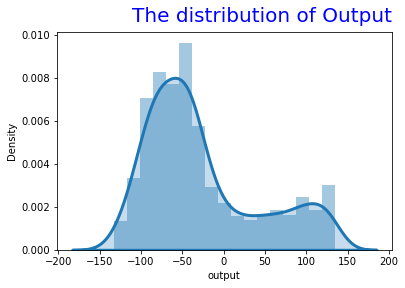

In [8]:
sns.distplot(df['output'], hist=True, kde=True, 
             kde_kws = {'shade': True, 'linewidth': 3})
plt.title("The distribution of Output",loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

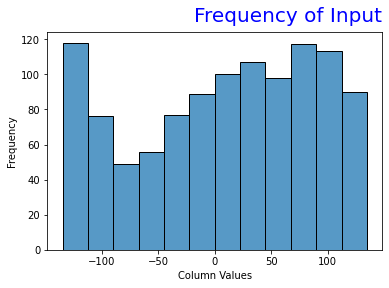

In [9]:
sns.histplot(df['input'])
plt.xlabel('Column Values')
plt.ylabel('Frequency')
plt.title('Frequency of Input',loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

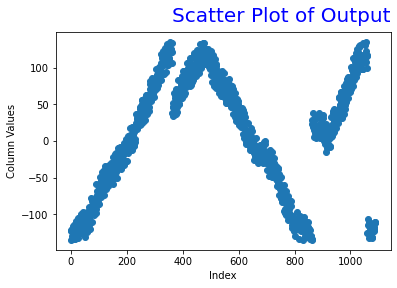

In [10]:
plt.scatter(range(len(df)), df['input'])
plt.xlabel('Index')
plt.ylabel('Column Values')
plt.title('Scatter Plot of Output',loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


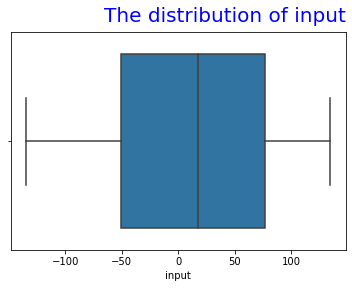

In [11]:
sns.boxplot(df['input'])
plt.title('The distribution of input',loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


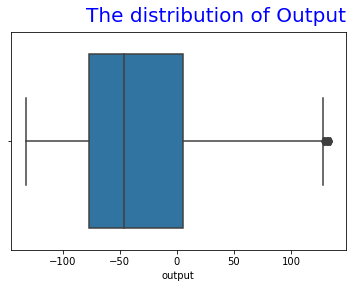

In [12]:
sns.boxplot(df['output'])
plt.title('The distribution of Output',loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

### the output data completely all the quartiles are distributed in negative values only we have huge outliers in Output

## Bivariat Analysis

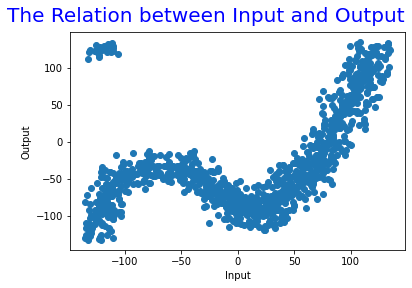

In [13]:
plt.scatter(df['input'], df['output'])
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('The Relation between Input and Output',loc='right',pad=10.5,fontdict= {'fontsize':20,'color':'blue'})
plt.show()

***we have almost positive correlation in between input and output
***all the positive values from input and above -100 values from Output are positively correlated

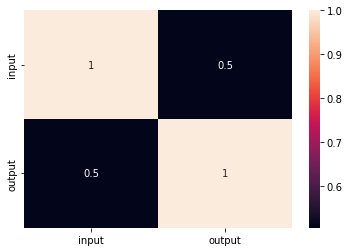

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### outliers handling

In [15]:
quar = df.quantile(q = [0.25,0.75],axis=0)
quar

,input,output
0.25,-51.041357,-76.994298
0.75,76.481078,5.113101


In [16]:
df['output']= np.where(df['output']>80,5.113101,df['output'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


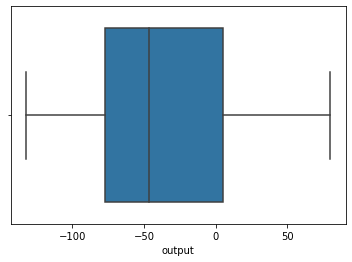

In [17]:
sns.boxplot(df['output'])
plt.show()

In [18]:
import scipy.stats as ss

In [19]:
df.isna().sum()

input     1
output    1
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [22]:
df.skew()

input    -0.283672
output    0.444588
dtype: float64

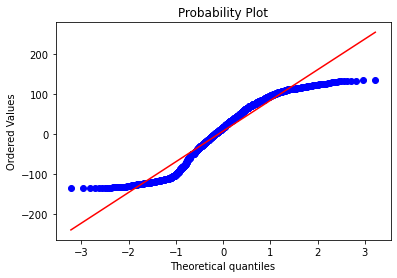

In [23]:
ss.probplot(df["input"], dist="norm",plot=plt)
plt.show()

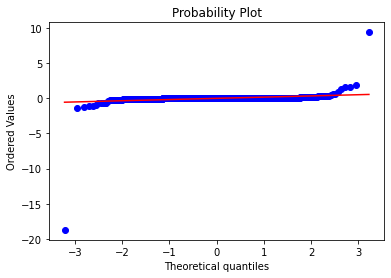

In [24]:
ss.probplot(np.reciprocal(df["input"]), dist="norm",plot=plt)
plt.show()

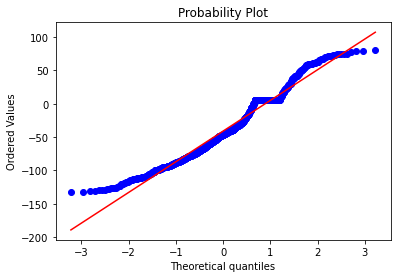

In [25]:
ss.probplot(df["output"], dist="norm",plot=plt)
plt.show()

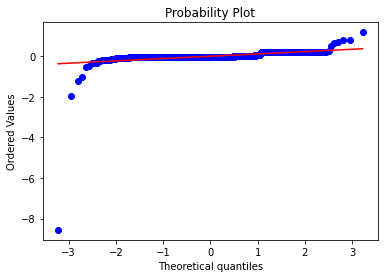

In [26]:
ss.probplot(np.reciprocal(df["output"]), dist="norm",plot=plt)
plt.show()

In [27]:
df['input']=np.reciprocal(df['input'])
df['output']=np.reciprocal(df['output'])

In [28]:
df.isnull().sum()

input     0
output    0
dtype: int64

### Train data set

In [29]:
data=df.copy()

In [30]:
features=data.drop('output',axis=1)
y_classlabel=data[['output']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(features,y_classlabel,train_size=0.7,random_state=100)

In [33]:
x_train.head()

,input
869,0.035550
965,0.025971
759,-0.013268
545,0.016347
893,0.053343


In [34]:
x_train.isna().sum()

input    0
dtype: int64

In [35]:
y_train.head()

,output
869,-0.009247
965,-0.013319
759,-0.031250
545,-0.034347
893,-0.011412


### scaling 

In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [37]:
nrm=MinMaxScaler()
std=StandardScaler()

In [38]:
x_train['input']=std.fit_transform(x_train[['input']])

In [39]:
x_test['input']=std.fit_transform(x_test[['input']])

### Model builiding

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(x_train,y_train)
ypred = lr.predict(x_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
mae = mean_absolute_error(y_test, ypred)
print("Mean Absolute Error:", mae) # very good mae

Mean Absolute Error: 0.05441163623947958


In [45]:
mse = mean_squared_error(y_test, ypred)
print("Mean Squared Error:", mse) # very good mse

Mean Squared Error: 0.01137615220404946


In [46]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse) # very good rmse

Root Mean Squared Error: 0.10665904651762766


In [47]:
r2 = np.abs(r2_score(y_test, ypred))
print("R-squared:", r2) # very bad r2

R-squared: 0.0059405192903361215


### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor
dst=DecisionTreeRegressor()

In [49]:
model_2=dst.fit(x_train,y_train)
predict_decision=model_2.predict(x_test)

In [50]:
np.abs(r2_score(y_test,predict_decision))

0.07006956368398076

***The Decision tree gave me good model***

In [51]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [52]:
model_3=dst.fit(x_train,y_train)
predict_svm=model_3.predict(x_test)

In [53]:
np.abs(r2_score(y_test,predict_decision))

0.07006956368398076